# Laboratorio 5
## 1) Calcolo zero funzione
### Esercizio 1:
Scrivere una funzione che implementi il metodo delle approssimazioni successive per il calcolo dello zero di una funzione $f(x)$ prendendo come input una delle seguenti funzioni per l’aggiornamento:
+ $g(x) = x − f(x)e^{x/2}$
+ $g(x) = x − f(x)e^{−x/2}$

Testare la funzione per trovare lo zero della funzione $f(x) = e^x − x^2$ , la cui soluzione è $x^\ast = −0.703467$.

Scrivere una funzione che implementi il metodo di Newton, ricordando che il metodo di Newton può essere considerato come un caso particolare del metodo delle approssimazioni successive dove la funzione di aggiornamento è $g(x) = x − f(x)/f′(x)$.
1. Disegnare il grafico della funzione $f$ nell’intervallo $I = [−1, 1]$ e verificare che $x^\ast$ sia lo zero di $f$ in $[−1, 1]$.
2. Calcolare lo zero della funzione utilizzando i metodi precedentemente descritti.
3. Confrontare l’accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.
4. Modificare le due funzioni in modo da calcolare l’errore ${\|x_k - x^\ast\|_2}$ ad ogni iterazione  -esima e graficare

fTrue =  8.035078391532835e-07
Metodo approssimazioni successive g1 
 x = -0.7034674225096886 
 iter_new= 23
Metodo approssimazioni successive g2 
 x = -0.48775858993453886 
 iter_new= 100
Metodo Newton 
 x = -0.7034674224983917 
 iter_new= 6


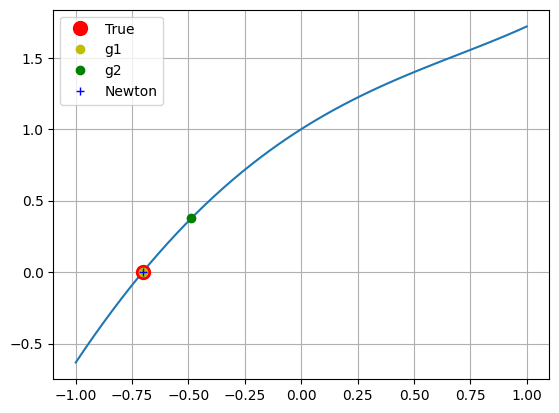

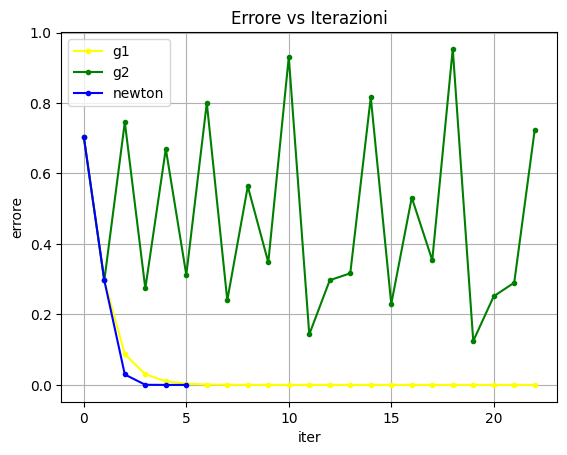

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
    i=0
    vecErrore=np.zeros(maxit+1, dtype=np.float64)
    vecErrore[0] = np.abs(x0-xTrue)
    x=x0
    while (np.abs(f(x)) > tolf or np.abs(x-x0) > tolx) and i < maxit: # scarto assoluto tra iterati
        x0 = x
        x= g(x0)
        vecErrore[i+1]= np.abs(x-xTrue)
        i=i+1
    return x, i, vecErrore[:i] 

def newton(f, df, tolf, tolx, maxit, xTrue, x0=0):
    g = lambda x: x-(f(x)/df(x))
    (x, i, vecErrore) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return x, i, vecErrore

f = lambda x: np.exp(x)-x**2
df = lambda x: np.exp(x)-2*x
g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)
xTrue = -0.703467
fTrue = f(xTrue)
print('fTrue = ', fTrue)
xplot = np.linspace(-1, 1)
fplot = f(xplot)
plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True', markersize=10)
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

[sol_g1, iter_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)
plt.plot(sol_g1,f(sol_g1), 'oy', label='g1')

[sol_g2, iter_g2, vecErrore_g2]=succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =',sol_g2,'\n iter_new=', iter_g2)
plt.plot(sol_g2,f(sol_g2), 'og', label='g2')

[sol_newton, iter_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)
plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.legend()
plt.grid()
plt.show()

plt.plot(vecErrore_g1, '.-', color='yellow')
plt.plot(vecErrore_g2[:max(iter_g1, iter_newton)], '.-', color='green')
plt.plot(vecErrore_newton, '.-', color='blue')
plt.legend( ("g1", "g2", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

### Esercizio 2:
Applicare il metodo delle approssimazioni successive e il metodo di Newton a:
+ $f(x) = x^3 + 4x\cos{x} − 2$ nell’intervallo $[0, 2]$, $g(x) = \dfrac{2 - x^3}{4\cos{x}}$, con $x^\ast \approx 0.5369$
+ $f(x) = x − x^{1/3} − 2$ nell’intervallo $[3, 5]$, $g(x) = x^{1/3} + 2$, con $x^\ast \approx 3.5213$

_Suggerimento per l’analisi dei risultati. Confronta l’accuratezza e il numero di iterazioni dei metodi al variare del punto iniziale e dei parametri per i criteri di arresto. Spiegare il comportamento dei metodi nei diversi casi._

fTrue =  1.4366462846027162e-06
Metodo approssimazioni successive g1 
 x = 0.5368385515655376 
 iter_new= 10
Metodo Newton 
 x = 0.5368385515645363 
 iter_new= 11


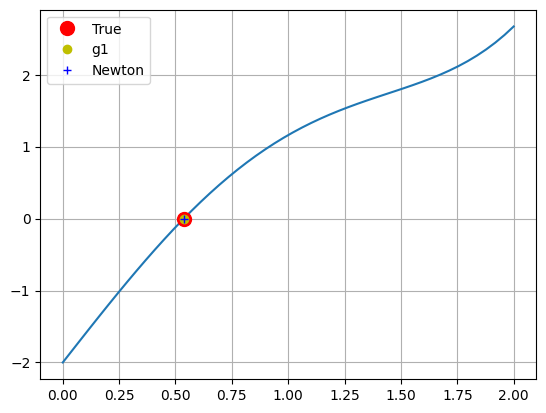

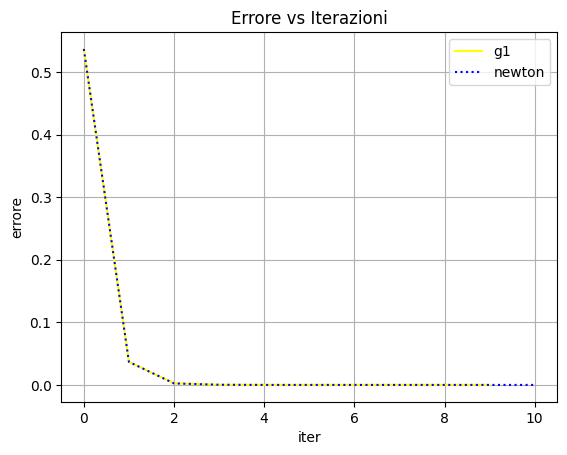

In [67]:
f = lambda x: x**3+4*x*np.cos(x)-2
df = lambda x: 2*x**2+4*np.cos(x)-4*x*np.sin(x)
g1 = lambda x: (2-x**3)/(4*np.cos(x))
xTrue = 0.536839
fTrue = f(xTrue)
print('fTrue = ', fTrue)
xplot = np.linspace(0, 2)
fplot = f(xplot)
plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True', markersize=10)
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

[sol_g1, iter_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)
plt.plot(sol_g1,f(sol_g1), 'oy', label='g1')

[sol_newton, iter_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)
plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

plt.plot(vecErrore_g1, '-', color='yellow')
plt.plot(vecErrore_newton, ':', color='blue')
plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  -6.822785407889498e-05
Metodo approssimazioni successive g1 
 x = 3.521379706798214 
 iter_new= 13
Metodo Newton 
 x = 3.521379706804568 
 iter_new= 4


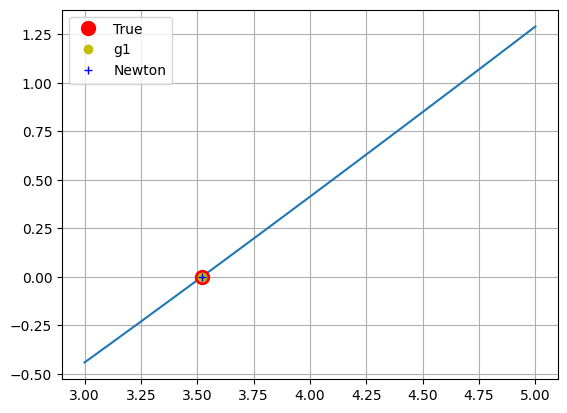

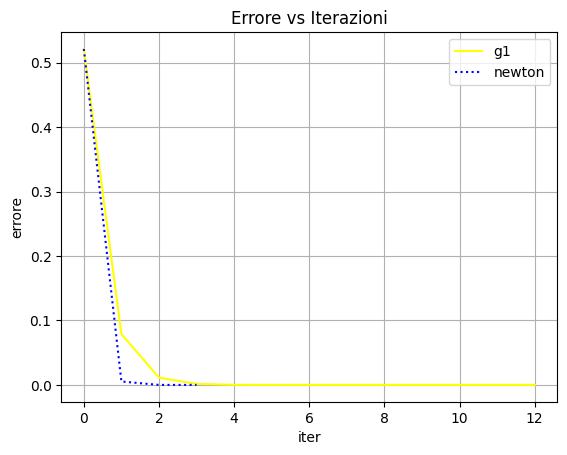

In [68]:
f = lambda x: x-x**(1/3)-2
df = lambda x: 1-(1/3)*x**(-2/3)
g1 = lambda x: x**(1/3)+2
xTrue = 3.5213
fTrue = f(xTrue)
print('fTrue = ', fTrue)
xplot = np.linspace(3, 5)
fplot = f(xplot)
plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True', markersize=10)
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 3

[sol_g1, iter_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)
plt.plot(sol_g1,f(sol_g1), 'oy', label='g1')

[sol_newton, iter_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)
plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

plt.plot(vecErrore_g1, '-', color='yellow')
plt.plot(vecErrore_newton, ':', color='blue')
plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()